In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import os

#### Load data

In [12]:
data = pd.read_csv(r'Data\USA_Housing.csv')
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


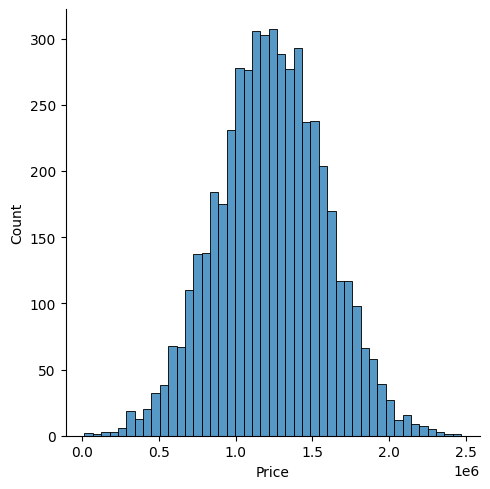

In [14]:
sns.displot(data['Price'])

#### Remove features

In [15]:
target = data['Price'].values
feature = data.drop(['Price','Address'], axis=1).values

#### Split data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=42)

#### Train model

In [17]:
reg = LinearRegression(fit_intercept=True)
model = reg.fit(X_train, y_train)

#### Predict on test data

In [18]:
prediction = model.predict(X_test)

#### Metrics

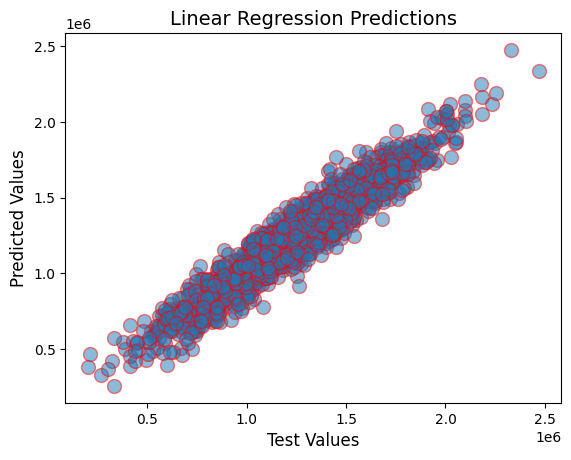

In [19]:
# Create a figure and axis
fig, ax = plt.subplots()

# Scatter plot with improved aesthetics
ax.scatter(y_test, prediction, alpha=0.5, edgecolors='r', s=100)

# Set plot title and labels
ax.set_title('Linear Regression Predictions', fontsize=14)
ax.set_xlabel('Test Values', fontsize=12)
ax.set_ylabel('Predicted Values', fontsize=12)

# Show the plot
plt.show()


In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

r2 = r2_score(y_test, prediction)
print(f'R^2 Score: {r2}')

mae = mean_absolute_error(y_test, prediction)
print(f'Mean Absolute Error: {mae}')

mse = mean_squared_error(y_test, prediction)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

mape = np.mean(np.abs((y_test - prediction) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')


R^2 Score: 0.9146818498754019
Mean Absolute Error: 81135.56609336873
Mean Squared Error: 10068422551.400846
Root Mean Squared Error: 100341.52954485419
Mean Absolute Percentage Error: 7.336544896281176%
